Proyek Akhir Machine Learning   
Carrissa Gloria Herman  
2702322411  
No. 1

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# import dataset
df = pd.read_csv('1A.tsv', sep='\t')
df.head(5)

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


In [3]:
df.tail(5)

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,2023/01/30,NaN,1957/12/11,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,415,2021/12/04,NaN,1985/12/11,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,416,2022/01/21,NaN,1967/12/12,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,417,2023/01/20,NaN,1966/12/11,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3
417,418,2022/04/10,NaN,1971/12/12,F,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,-1.0,350.0,10.6,Stage4


# EDA

## Data Understanding

In [4]:
df.shape

(418, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

In [6]:
df.columns

Index(['ID', 'Registration Date', 'Drug', 'Birth Date', 'Gender', 'Ascites',
       'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [7]:
# baca all values untuk tiap column
for col in df.columns:
  print(col, "column")
  print("Num of unique values:", df[col].nunique())
  print("Num of non-null values:", df[col].count())
  print(df[col].value_counts())
  print(' ')

ID column
Num of unique values: 418
Num of non-null values: 418
ID
1      1
314    1
286    1
285    1
284    1
283    1
282    1
281    1
280    1
279    1
278    1
277    1
276    1
275    1
274    1
273    1
272    1
271    1
270    1
269    1
268    1
267    1
266    1
265    1
264    1
287    1
288    1
289    1
302    1
312    1
311    1
310    1
309    1
308    1
307    1
306    1
305    1
304    1
303    1
301    1
290    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
293    1
292    1
291    1
263    1
262    1
261    1
223    1
233    1
232    1
231    1
230    1
229    1
228    1
227    1
226    1
225    1
224    1
222    1
235    1
221    1
220    1
219    1
218    1
217    1
216    1
215    1
214    1
213    1
212    1
234    1
236    1
260    1
249    1
259    1
258    1
257    1
256    1
255    1
254    1
253    1
252    1
251    1
250    1
248    1
237    1
247    1
246    1
245    1
244    1
243    1
242    1
241    1
240    1
239    1
238    1
313   

## Data Preprocessing

### Perbaiki Column

In [8]:
# Perbaiki data value yang salah format
df['Drug'].value_counts()

,count
Drug,
D-penicillamine,155
Placebo,152
d-penicillamine,3
placebo,1
lacebo,1


In [9]:
# ubah:
# 'placebo' dan 'lacebo' -> 'Placebo'
# 'd-penicillamine' -> 'D-penicillamine'
df['Drug'] = df['Drug'].replace(['placebo', 'lacebo'], 'Placebo')
df['Drug'] = df['Drug'].replace('d-penicillamine', 'D-penicillamine')
df['Drug'].value_counts()

,count
Drug,
D-penicillamine,158
Placebo,154


In [10]:
# ubah format penulisan dari column 'Stage'
df['Stage'].value_counts()

,count
Stage,
stage_3,155
Stage4,144
Stage 2,92
Stage 1,21


In [11]:
# ubah semua jadi format 'Stage 1':
# 'stage_3' -> 'Stage 3'
# 'Stage4' -> 'Stage 4'

df['Stage'] = df['Stage'].replace('stage_3', 'Stage 3')
df['Stage'] = df['Stage'].replace('Stage4', 'Stage 4')

# cek ulang
df['Stage'].value_counts()

,count
Stage,
Stage 3,155
Stage 4,144
Stage 2,92
Stage 1,21


In [12]:
# Ubah 'Registration Date' dan 'Birth Date' agar bisa diterima oleh ML model. Caranya:
# 1. ubah data type untuk column 'Registration Date' dan 'Birth Date' menjadi datetime
import datetime

df['Registration Date'] = pd.to_datetime(df['Registration Date'])
df['Birth Date'] = pd.to_datetime(df['Birth Date'])
df.head(5)

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023-11-07,D-penicillamine,1966-03-07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage 4
1,2,2012-08-16,D-penicillamine,1968-07-01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,Stage 3
2,3,2022-03-05,D-penicillamine,1954-11-15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage 4
3,4,2019-09-04,D-penicillamine,1970-03-16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage 4
4,5,2020-10-29,Placebo,1986-11-03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,Stage 3


In [13]:
# 2. cek data typenya sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         418 non-null    int64         
 1   Registration Date          418 non-null    datetime64[ns]
 2   Drug                       312 non-null    object        
 3   Birth Date                 418 non-null    datetime64[ns]
 4   Gender                     418 non-null    object        
 5   Ascites                    312 non-null    object        
 6   Hepatomegaly               312 non-null    object        
 7   Edema                      418 non-null    object        
 8   Bilirubin                  418 non-null    float64       
 9   Cholesterol                80 non-null     float64       
 10  Albumin                    418 non-null    float64       
 11  Copper                     310 non-null    float64       
 12  Alkaline

In [14]:
# Ubah column 'Tryglicerides' yang punya value -1
# Seseorang tidak mungkin punya -1 mg/dL apapun di dalam tubuhnya. Angkanya tidak mungkin -1.

df['Tryglicerides'].value_counts()
# di row pertama

,count
Tryglicerides,
-1.0,136
118.0,7
90.0,6
91.0,6
108.0,5
101.0,5
68.0,5
55.0,5
56.0,5


In [15]:
# artinya data -1 kemungkinan adalah kesalahan input
# mungkin saja -1 berarti tidak dilakukan tes
# karena kita tidak tahu nilai yang seharusnya, jadi kita anggap dia sebagai missing value
# ubah jadi missing values
df.loc[df['Tryglicerides'] == -1, 'Tryglicerides'] = np.nan
# pastikan sudah berubah
df['Tryglicerides'].value_counts()

,count
Tryglicerides,
118.0,7
90.0,6
91.0,6
68.0,5
56.0,5
101.0,5
55.0,5
108.0,5
146.0,4


### Missing Values

In [16]:
df.isna().sum()

,0
ID,0
Registration Date,0
Drug,106
Birth Date,0
Gender,0
Ascites,106
Hepatomegaly,106
Edema,0
Bilirubin,0
Cholesterol,338


Categorical variables with missing values:  
1. 'Drug'
2. 'Ascites'
3. 'Hepatomegaly'
4. 'Stage'

Numerical variables with missing values:
1. 'Cholesterol'
2. 'Copper'
3. 'Alkaline Phospatase (U/L)'
4. 'SGOT'
5. 'Tryglicerides'
6. 'Platelets'
7. 'Prothrombin'

#### Categorical Variables

##### Stage

In [17]:
# 'Stage'
# 'Stage' di-impute duluan karena menjadi basis impute variabel lain
# cari mode dari 'Stage'
df['Stage'].value_counts().sort_values(ascending = False)

,count
Stage,
Stage 3,155
Stage 4,144
Stage 2,92
Stage 1,21


In [18]:
# mode nya adalah 'Stage 3'
# impute missing values dengan mode, yaitu 'Stage 3'
# impute missing values karena jumlah missing values cuma 6, jadi imputing tidak akan berpengaruh banyak terhadap keaslian data
df['Stage'] = df['Stage'].fillna('Stage 3')

# pastikan missing values sudah ter-impute
df['Stage'].isna().sum()

0

##### Drug

In [19]:
# 'Drug'
# impute missing values berdasarkan mode dari stage-nya
# impute missing values bukan drop row karena jumlah missing values terlalu banyak (106)
# kalau rownya di drop, takutnya jumlah data terlalu sedikit untuk model machine learning padahal row awal cuma ada 418

# cari mode dari tiap 'Stage'
df.groupby('Stage')['Drug'].value_counts()

Stage    Drug           
Stage 1  D-penicillamine    12
         Placebo             4
Stage 2  D-penicillamine    35
         Placebo            32
Stage 3  Placebo            64
         D-penicillamine    56
Stage 4  D-penicillamine    55
         Placebo            54
Name: count, dtype: int64

In [20]:
# Mode:
# Stage 1 -> D-penicillamine
# Stage 2 -> D-penicillamine
# Stage 3 -> Placebo
# Stage 4 -> D-penicillamine

# impute missing values berdasarkan mode masing-masing stage
df['Drug'] = df.groupby('Stage')['Drug'].transform(lambda x: x.fillna(x.value_counts().index[0]))

# pastikan missing value sudah ter-impute
df['Drug'].isna().sum()

0

In [21]:
# pastikan missing value ter-impute sesuai dengan mode dari tiap stage
df.groupby('Stage')['Drug'].value_counts()

Stage    Drug           
Stage 1  D-penicillamine     17
         Placebo              4
Stage 2  D-penicillamine     60
         Placebo             32
Stage 3  Placebo            105
         D-penicillamine     56
Stage 4  D-penicillamine     90
         Placebo             54
Name: count, dtype: int64

##### Ascites

In [22]:
# 'Ascites'
# impute missing values berdasarkan mode dari stage-nya
# impute missing values bukan drop row karena jumlah missing values terlalu banyak (106)
# kalau rownya di drop, takutnya jumlah data terlalu sedikit untuk model machine learning padahal row awal cuma ada 418

# cari mode dari tiap 'Stage'
df.groupby('Stage')['Ascites'].value_counts()

Stage    Ascites
Stage 1  N           16
Stage 2  N           65
         Y            2
Stage 3  N          119
         Y            1
Stage 4  N           88
         Y           21
Name: count, dtype: int64

In [23]:
# semua Stage mode-nya 'N'
# jadi langsung fill na saja dengan N
df['Ascites'] = df['Ascites'].fillna('N')

# pastikan missing value sudah ter-impute
df['Ascites'].isna().sum()

0

##### Hepatomegaly

In [24]:
# 'Hepatomegaly'
# impute missing values berdasarkan mode dari stage-nya
# impute missing values bukan drop row karena jumlah missing values terlalu banyak (106)
# kalau rownya di drop, takutnya jumlah data terlalu sedikit untuk model machine learning padahal row awal cuma ada 418

# cari mode dari tiap 'Stage'
df.groupby('Stage')['Hepatomegaly'].value_counts()

Stage    Hepatomegaly
Stage 1  N               16
Stage 2  N               48
         Y               19
Stage 3  N               67
         Y               53
Stage 4  Y               88
         N               21
Name: count, dtype: int64

In [25]:
# Mode:
# Stage 1 -> N
# Stage 2 -> N
# Stage 3 -> N
# Stage 4 -> Y

# impute missing values berdasarkan mode masing-masing stage
df['Hepatomegaly'] = df.groupby('Stage')['Hepatomegaly'].transform(lambda x: x.fillna(x.value_counts().index[0]))

# pastikan missing value sudah ter-impute
df['Hepatomegaly'].isna().sum()

0

#### Numerical Variables

##### Cholesterol

<Axes: >

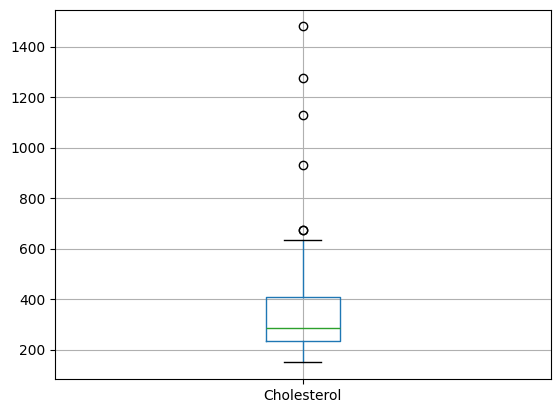

In [26]:
# 'Cholesterol'
# cek outlier
df.boxplot(column=['Cholesterol'])

In [27]:
# ada outlier, cek berapa banyak outlier

# bikin function untuk deteksi outlier menggunakan IQR method
# outlier adalah data yang dibawah q1-1,5*IQR atau diatas q3+1,5*IQR
outliers = []
def detect_outliers_iqr(data):
    # urutkan data
    data = sorted(data)
    # cari q1, q3, dan IQR
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    IQR = q3-q1
    # cari batas outlier (lower dan upper bound)
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    # iterasi tiap row
    for i in data:
        if (i < lower_bound or i > upper_bound):
            outliers.append(i)
    return outliers

Cholesterol_outlier = detect_outliers_iqr(df['Cholesterol'])
print("Outliers di column Cholesterol:", Cholesterol_outlier)
print("Jumlah outliers di column Chlosterol:", len(Cholesterol_outlier))

Outliers di column Cholesterol: [1128.0, 932.0, 674.0, 1480.0, 674.0, 1276.0]
Jumlah outliers di column Chlosterol: 6


In [28]:
# cek data yang ada outlier
df.loc[df['Cholesterol'].isin(Cholesterol_outlier), ['Cholesterol', 'Stage']]

,Cholesterol,Stage
25,1128.0,Stage 3
62,932.0,Stage 3
74,674.0,Stage 4
165,1480.0,Stage 2
183,674.0,Stage 3
214,1276.0,Stage 3


In [29]:
# bandingkan dengan mean cholesterol tiap stage
df.groupby('Stage')['Cholesterol'].mean()

,Cholesterol
Stage,
Stage 1,261.142857
Stage 2,404.187500
Stage 3,419.656250
Stage 4,278.760000


In [30]:
# outlier di data cholesterol punya nilai dari 674.0 sampai 1480.0.
# data dengan cholesterol 674.0 bisa dibiarkan karena cukup dekat dengan mean Stage 3. Artinya, kemungkinan itu hanya variabilitas data pada umumnya
# sedangkan data dengan cholesterol 932.0 ke atas bisa di-treat karena sudah tidak normal. Nilainya terlalu besar jika dibandingkan nilai yang lain

# keluarkan 674.0 dari list outliers
Cholesterol_outlier.remove(674.0)
Cholesterol_outlier.remove(674.0)
# dilakukakn 2 kali karena ada 2 value 674.0

# hitung kembali jumlah outliers
len(Cholesterol_outlier)

4

In [31]:
# replace value outliers dengan mean berdasarkan stage-nya
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
# buat dataframe yang berisi mean cholesterol untuk tiap stage
mean_cholesterol = pd.DataFrame(df.groupby('Stage')['Cholesterol'].mean())
mean_cholesterol['Stage'] = mean_cholesterol.index
mean_cholesterol

,Cholesterol,Stage
Stage,,
Stage 1,261.142857,Stage 1
Stage 2,404.187500,Stage 2
Stage 3,419.656250,Stage 3
Stage 4,278.760000,Stage 4


In [32]:
# replace outlier dengan mean
for (i, j) in zip(df['Cholesterol'], df['Stage']):
  if i in Cholesterol_outlier:
    #print(a, i, j)
    #print(mean_cholesterol.loc[mean_cholesterol['Stage'] == j].iloc[0,0])
    df.loc[df['Cholesterol'] == i, 'Cholesterol'] = mean_cholesterol.loc[mean_cholesterol['Stage'] == j].iloc[0,0]

# cek ulang outlier
Cholesterol_outlier_list2 = []
for i in df['Cholesterol']:
  if i in Cholesterol_outlier:
    Cholesterol_outlier_list2.append(i)
print(Cholesterol_outlier_list2)

[]


In [33]:
# list outlier sudah kosong artinya smua outlier sudah ditangani
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['Cholesterol'].mean()

,Cholesterol
Stage,
Stage 1,261.142857
Stage 2,336.949219
Stage 3,354.749023
Stage 4,278.760000


In [34]:
# impute missing values dengan mean Stage
df['Cholesterol'] = df.groupby('Stage')['Cholesterol'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['Cholesterol'].isna().sum()

0

##### Copper

<Axes: >

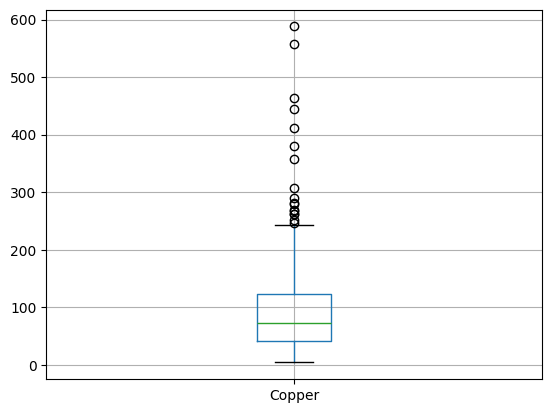

In [35]:
# 'Copper'
# cek outlier
df.boxplot(column=['Copper'])

In [36]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Copper_outlier = detect_outliers_iqr(df['Copper'])
print("Outliers di column Copper:", Copper_outlier)
print("Jumlah outliers di column Copper:", len(Copper_outlier))

Outliers di column Copper: [247.0, 262.0, 262.0, 269.0, 280.0, 281.0, 290.0, 444.0, 464.0, 558.0, 308.0, 412.0, 251.0, 267.0, 358.0, 380.0, 588.0]
Jumlah outliers di column Copper: 17


In [37]:
# cek data yang ada outlier
df.loc[df['Copper'].isin(Copper_outlier), ['Copper', 'Stage']]

,Copper,Stage
17,588.0,Stage 4
21,464.0,Stage 4
22,558.0,Stage 4
47,281.0,Stage 3
53,262.0,Stage 4
73,280.0,Stage 4
79,269.0,Stage 4
119,444.0,Stage 3
137,262.0,Stage 3
147,247.0,Stage 3


In [38]:
# bandingkan dengan mean copper tiap stage
df.groupby('Stage')['Copper'].mean()

,Copper
Stage,
Stage 1,62.812500
Stage 2,68.030303
Stage 3,92.075000
Stage 4,127.101852


In [39]:
# saya mengambil batas 300.0 untuk outlier
# 'Copper' di atas 300.0 dianggap outlier dan akan di-treat, sedangkan yang di bawah 300.0 akan dibiarkan dan dianggap variabilitas normal

# ubah list outlier jadi yg di atas 300.0 saja
Copper_outlier = [x for x in Copper_outlier if x > 300]
print(Copper_outlier)
len(Copper_outlier)

[444.0, 464.0, 558.0, 308.0, 412.0, 358.0, 380.0, 588.0]


8

In [40]:
# replace value outliers dengan mean berdasarkan stage-nya
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
# buat dataframe yang berisi mean copper untuk tiap stage
mean_copper = pd.DataFrame(df.groupby('Stage')['Copper'].mean())
mean_copper['Stage'] = mean_copper.index
mean_copper

,Copper,Stage
Stage,,
Stage 1,62.812500,Stage 1
Stage 2,68.030303,Stage 2
Stage 3,92.075000,Stage 3
Stage 4,127.101852,Stage 4


In [41]:
# replace outlier dengan mean
for (i, j) in zip(df['Copper'], df['Stage']):
  if i in Copper_outlier:
    df.loc[df['Copper'] == i, 'Copper'] = mean_copper.loc[mean_copper['Stage'] == j].iloc[0,0]

# cek ulang outlier
Copper_outlier_list2 = []
for i in df['Copper']:
  if i in Copper_outlier:
    Copper_outlier_list2.append(i)
print(Copper_outlier_list2)

[]


In [42]:
# list outlier sudah kosong artinya smua outlier sudah ditangani
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['Copper'].mean()

,Copper
Stage,
Stage 1,62.812500
Stage 2,68.030303
Stage 3,86.926250
Stage 4,109.070473


In [43]:
# impute missing values dengan mean Stage
df['Copper'] = df.groupby('Stage')['Copper'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['Copper'].isna().sum()

0

##### Alkaline Phospatase (U/L)

<Axes: >

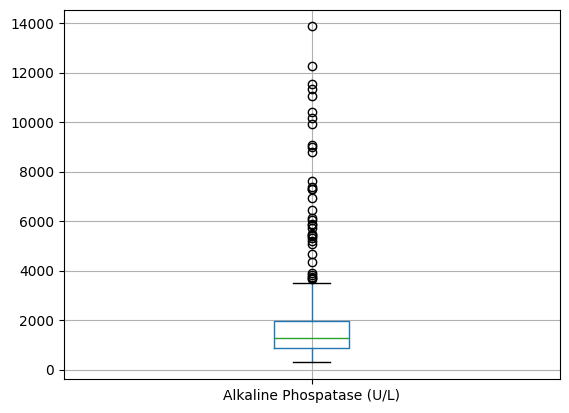

In [44]:
# 'Alkaline Phospatase (U/L)'
# cek outlier
df.boxplot(column=['Alkaline Phospatase (U/L)'])

In [45]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Alkaline_outlier = detect_outliers_iqr(df['Alkaline Phospatase (U/L)'])
print("Outliers di column Alkaline Phospatase (U/L):", Alkaline_outlier)
print("Jumlah outliers di column Alkaline Phospatase (U/L):", len(Alkaline_outlier))

Outliers di column Alkaline Phospatase (U/L): [3681.0, 3697.4, 3740.0, 3836.0, 3896.0, 4332.0, 4651.2, 5084.4, 5184.0, 5300.0, 5396.0, 5430.2, 5487.2, 5719.0, 5833.0, 5890.0, 6064.8, 6121.8, 6456.2, 6931.2, 7277.0, 7277.0, 7394.8, 7622.8, 8778.0, 9009.8, 9066.8, 9933.2, 10165.0, 10396.8, 11046.6, 11320.2, 11552.0, 12258.8, 13862.4]
Jumlah outliers di column Alkaline Phospatase (U/L): 35


In [46]:
# cek data yang ada outlier
df.loc[df['Alkaline Phospatase (U/L)'].isin(Alkaline_outlier), ['Alkaline Phospatase (U/L)', 'Stage']]

,Alkaline Phospatase (U/L),Stage
1,7394.8,Stage 3
3,6121.8,Stage 4
7,4651.2,Stage 3
14,9009.8,Stage 3
22,6064.8,Stage 4
23,5719.0,Stage 2
26,3697.4,Stage 4
28,5833.0,Stage 2
29,7277.0,Stage 4
30,9933.2,Stage 2


In [47]:
# bandingkan dengan mean Alkaline Phospatase (U/L) tiap stage
df.groupby('Stage')['Alkaline Phospatase (U/L)'].mean()

,Alkaline Phospatase (U/L)
Stage,
Stage 1,1694.212500
Stage 2,1816.907463
Stage 3,2082.128333
Stage 4,2017.366972


In [48]:
# saya mengambil batas 4000.0 untuk outlier
# 'Alkaline Phospatase (U/L)' di atas 4000.0 dianggap outlier dan akan di-treat,
# sedangkan yang di bawah 4000.0 akan dibiarkan dan dianggap variabilitas normal

# ubah list outlier jadi yg di atas 300.0 saja
Alkaline_outlier = [x for x in Alkaline_outlier if x > 4000]
print(Alkaline_outlier)
len(Alkaline_outlier)

[4332.0, 4651.2, 5084.4, 5184.0, 5300.0, 5396.0, 5430.2, 5487.2, 5719.0, 5833.0, 5890.0, 6064.8, 6121.8, 6456.2, 6931.2, 7277.0, 7277.0, 7394.8, 7622.8, 8778.0, 9009.8, 9066.8, 9933.2, 10165.0, 10396.8, 11046.6, 11320.2, 11552.0, 12258.8, 13862.4]


30

In [49]:
# replace value outliers dengan mean berdasarkan stage-nya
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
# buat dataframe yang berisi mean alkaline untuk tiap stage
mean_alkaline = pd.DataFrame(df.groupby('Stage')['Alkaline Phospatase (U/L)'].mean())
mean_alkaline['Stage'] = mean_alkaline.index
mean_alkaline

,Alkaline Phospatase (U/L),Stage
Stage,,
Stage 1,1694.212500,Stage 1
Stage 2,1816.907463,Stage 2
Stage 3,2082.128333,Stage 3
Stage 4,2017.366972,Stage 4


In [50]:
# replace outlier dengan mean
for (i, j) in zip(df['Alkaline Phospatase (U/L)'], df['Stage']):
  if i in Alkaline_outlier:
    df.loc[df['Alkaline Phospatase (U/L)'] == i, 'Alkaline Phospatase (U/L)'] = mean_alkaline.loc[mean_alkaline['Stage'] == j].iloc[0,0]

# cek ulang outlier
Alkaline_outlier_list2 = []
for i in df['Alkaline Phospatase (U/L)']:
  if i in Alkaline_outlier:
    Alkaline_outlier_list2.append(i)
print(Alkaline_outlier_list2)

[]


In [51]:
# list outlier sudah kosong artinya smua outlier sudah ditangani
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['Alkaline Phospatase (U/L)'].mean()

,Alkaline Phospatase (U/L)
Stage,
Stage 1,994.727344
Stage 2,1306.334997
Stage 3,1481.728431
Stage 4,1518.899722


In [52]:
# impute missing values dengan mean Stage
df['Alkaline Phospatase (U/L)'] = df.groupby('Stage')['Alkaline Phospatase (U/L)'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['Alkaline Phospatase (U/L)'].isna().sum()

0

##### SGOT

<Axes: >

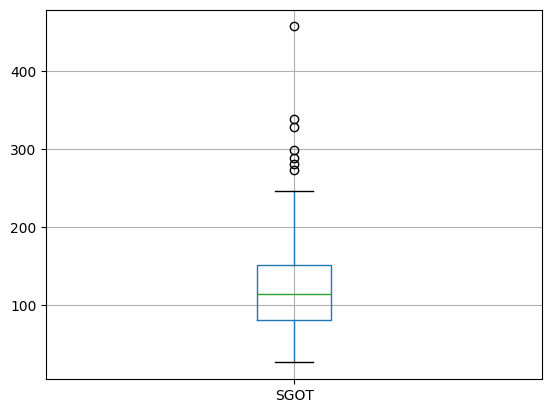

In [53]:
# 'SGOT'
# cek outlier
df.boxplot(column=['SGOT'])

In [54]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
SGOT_outlier = detect_outliers_iqr(df['SGOT'])
print("Outliers di column SGOT:", SGOT_outlier)
print("Jumlah outliers di column SGOT:", len(SGOT_outlier))

Outliers di column SGOT: [272.8, 280.55, 288.0, 299.15, 328.6, 338.0, 457.25]
Jumlah outliers di column SGOT: 7


In [55]:
# cek data yang ada outlier
df.loc[df['SGOT'].isin(SGOT_outlier), ['SGOT', 'Stage']]

,SGOT,Stage
17,280.55,Stage 4
66,328.60,Stage 3
127,299.15,Stage 4
165,457.25,Stage 2
243,272.80,Stage 3
280,338.00,Stage 4
304,288.00,Stage 3


In [56]:
# bandingkan dengan mean SGOT tiap stage
df.groupby('Stage')['SGOT'].mean()

,SGOT
Stage,
Stage 1,84.460000
Stage 2,115.562388
Stage 3,124.326750
Stage 4,130.498440


In [57]:
# semua data outlier saya anggap karena variabilitas yang normal. Karena trend-nya adalah semakin tinggi stage, maka semaking tinggi SGOT-nya
# Tapi data dengan index 165, SGOT 457.25, dan Stage 2 tidak normal karena  SGOT-nya jauh lebih tinggi dari rata-rata stagenya, yaitu 115.562388

# replace value outliers dengan data index 165, SGOT 457.25, dan Stage 2 dengan mean Stage 2, yaitu 115.562388
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
df.iloc[165, 13] = 115.562388

# pastikan datanya sudah berubah
df.iloc[165, :]

,165
ID,166
Registration Date,2017-06-30 00:00:00
Drug,Placebo
Birth Date,1983-08-04 00:00:00
Gender,F
Ascites,N
Hepatomegaly,Y
Edema,N
Bilirubin,5.7
Cholesterol,404.1875


In [58]:
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['SGOT'].mean()

,SGOT
Stage,
Stage 1,84.460000
Stage 2,110.462573
Stage 3,124.326750
Stage 4,130.498440


In [59]:
# impute missing values dengan mean Stage
df['SGOT'] = df.groupby('Stage')['SGOT'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['SGOT'].isna().sum()

0

##### Tryglicerides

<Axes: >

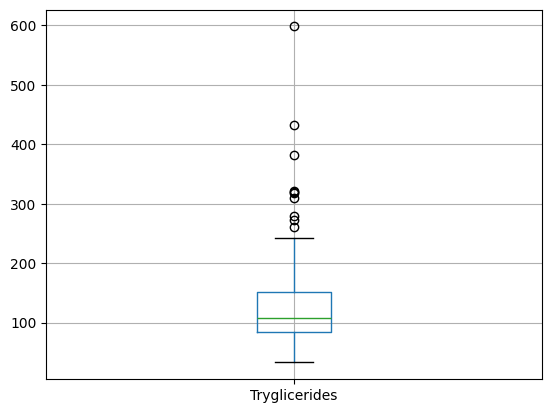

In [60]:
# 'Tryglicerides'
# cek outlier
df.boxplot(column=['Tryglicerides'])

In [61]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Tryglicerides_outlier = detect_outliers_iqr(df['Tryglicerides'])
print("Outliers di column Tryglicerides:", Tryglicerides_outlier)
print("Jumlah outliers di column Tryglicerides:", len(Tryglicerides_outlier))

Outliers di column Tryglicerides: [309.0, 319.0, 272.0, 318.0, 598.0, 382.0, 280.0, 432.0, 322.0, 260.0]
Jumlah outliers di column Tryglicerides: 10


In [62]:
# cek data yang ada outlier
df.loc[df['Tryglicerides'].isin(Tryglicerides_outlier), ['Tryglicerides', 'Stage']]

,Tryglicerides,Stage
55,319.0,Stage 2
73,309.0,Stage 4
74,598.0,Stage 4
80,318.0,Stage 4
81,272.0,Stage 3
115,382.0,Stage 3
147,280.0,Stage 3
190,432.0,Stage 4
240,322.0,Stage 4
265,260.0,Stage 3


In [63]:
# bandingkan dengan mean copper tiap stage
df.groupby('Stage')['Tryglicerides'].mean()

,Tryglicerides
Stage,
Stage 1,90.846154
Stage 2,113.950820
Stage 3,130.734513
Stage 4,129.063158


In [64]:
# saya mengambil batas 300.0 untuk outlier
# 'Tryglicerides' di atas 300.0 dianggap outlier dan akan di-treat, sedangkan yang di bawah 300.0 akan dibiarkan dan dianggap variabilitas normal

# ubah list outlier jadi yg di atas 300.0 saja
Tryglicerides_outlier = [x for x in Tryglicerides_outlier if x > 300]
print(Tryglicerides_outlier)
len(Tryglicerides_outlier)

[309.0, 319.0, 318.0, 598.0, 382.0, 432.0, 322.0]


7

In [65]:
# replace value outliers dengan mean berdasarkan stage-nya
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
# buat dataframe yang berisi mean cholesterol untuk tiap stage
mean_Tryglicerides = pd.DataFrame(df.groupby('Stage')['Tryglicerides'].mean())
mean_Tryglicerides['Stage'] = mean_Tryglicerides.index
mean_Tryglicerides

,Tryglicerides,Stage
Stage,,
Stage 1,90.846154,Stage 1
Stage 2,113.950820,Stage 2
Stage 3,130.734513,Stage 3
Stage 4,129.063158,Stage 4


In [66]:
# replace outlier dengan mean
for (i, j) in zip(df['Tryglicerides'], df['Stage']):
  if i in Tryglicerides_outlier:
    df.loc[df['Tryglicerides'] == i, 'Tryglicerides'] = mean_Tryglicerides.loc[mean_Tryglicerides['Stage'] == j].iloc[0,0]

# cek ulang outlier
Tryglicerides_outlier_list2 = []
for i in df['Tryglicerides']:
  if i in Tryglicerides_outlier:
    Tryglicerides_outlier_list2.append(i)
print(Tryglicerides_outlier_list2)

[]


In [67]:
# list outlier sudah kosong artinya smua outlier sudah ditangani
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['Tryglicerides'].mean()

,Tryglicerides
Stage,
Stage 1,90.846154
Stage 2,110.589358
Stage 3,128.510925
Stage 4,115.024377


In [68]:
# impute missing values dengan mean Stage
df['Tryglicerides'] = df.groupby('Stage')['Tryglicerides'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['Tryglicerides'].isna().sum()

0

##### Platelets

<Axes: >

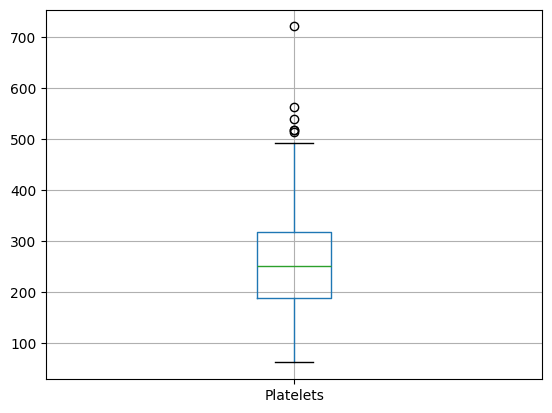

In [69]:
# 'Platelets'
# cek outlier
df.boxplot(column=['Platelets'])

In [70]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Platelets_outlier = detect_outliers_iqr(df['Platelets'])
print("Outliers di column Platelets:", Platelets_outlier)
print("Jumlah outliers di column Platelets:", len(Platelets_outlier))

Outliers di column Platelets: [518.0, 563.0, 721.0, 514.0, 517.0, 539.0]
Jumlah outliers di column Platelets: 6


In [71]:
# cek data yang ada outlier
df.loc[df['Platelets'].isin(Platelets_outlier), ['Platelets', 'Stage']]

,Platelets,Stage
38,563.0,Stage 4
45,518.0,Stage 3
181,539.0,Stage 2
201,514.0,Stage 2
333,721.0,Stage 3
360,517.0,Stage 4


In [72]:
# bandingkan dengan mean copper tiap stage
df.groupby('Stage')['Platelets'].mean()

,Platelets
Stage,
Stage 1,291.800000
Stage 2,286.895349
Stage 3,265.213836
Stage 4,224.866197


In [73]:
# outlier yang aneh adalah data:
# index: 333, Platelets: 721.0, Stage 3
# data ini aneh karena di terlalu tinggi dibandingkan mean pada umumnya, khususnya mean Stage 3, yaitu 265.213836
# data lain bisa dianggap variabilitas normal karena mungkin saja orang-orang tersebut memiliki tingkat Platelets yang tinggi
# karena dietnya mengonsumsi banyak makanan yang meningkatkan produksi Platelets seperti susu dan sayur-sayuran hijau.

# artinya kita cuma perlu mengubah satu data saja, yaitu:
# data dengan index 333 dengan Platelets 721.0 menjadi mean Stage 3, yaitu 265.213836
df.iloc[333,15] = 265.213836

# pastikan datanya sudah berubah
df.iloc[333, :]

,333
ID,334
Registration Date,2023-09-02 00:00:00
Drug,Placebo
Birth Date,1968-12-11 00:00:00
Gender,F
Ascites,N
Hepatomegaly,N
Edema,N
Bilirubin,7.1
Cholesterol,354.749023


In [74]:
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['Platelets'].mean()

,Platelets
Stage,
Stage 1,291.800000
Stage 2,286.895349
Stage 3,262.347257
Stage 4,224.866197


In [75]:
# impute missing values dengan mean Stage
df['Platelets'] = df.groupby('Stage')['Platelets'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['Platelets'].isna().sum()

0

##### Prothrombin

<Axes: >

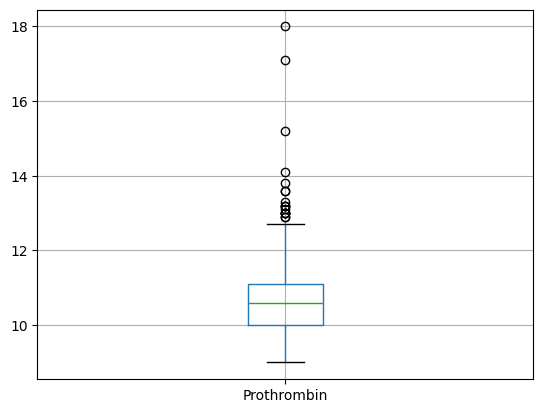

In [76]:
# 'Prothrombin'
# cek outlier
df.boxplot(column=['Prothrombin'])

In [77]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Prothrombin_outlier = detect_outliers_iqr(df['Prothrombin'])
print("Outliers di column Prothrombin:", Prothrombin_outlier)
print("Jumlah outliers di column Prothrombin:", len(Prothrombin_outlier))

Outliers di column Prothrombin: [13.1, 13.6, 13.8, 18.0, 12.9, 12.9, 13.0, 13.0, 13.0, 13.0, 13.2, 13.2, 13.2, 13.3, 13.6, 14.1, 15.2, 17.1]
Jumlah outliers di column Prothrombin: 18


In [78]:
# cek data yang ada outlier
df.loc[df['Prothrombin'].isin(Prothrombin_outlier), ['Prothrombin', 'Stage']]

,Prothrombin,Stage
11,13.6,Stage 4
19,13.0,Stage 4
27,13.0,Stage 4
60,13.0,Stage 1
61,13.2,Stage 4
82,12.9,Stage 4
106,17.1,Stage 1
120,13.2,Stage 4
122,13.0,Stage 4
130,13.2,Stage 4


In [79]:
# bandingkan dengan mean Prothrombin tiap stage
df.groupby('Stage')['Prothrombin'].mean()

,Prothrombin
Stage,
Stage 1,10.780000
Stage 2,10.525000
Stage 3,10.474534
Stage 4,11.147552


In [80]:
# saya mengambil batas 15.0 untuk outlier
# 'Prothrombin' di atas 15.0 dianggap outlier dan akan di-treat, sedangkan yang di bawah 15.0 akan dibiarkan dan dianggap variabilitas normal

# ubah list outlier jadi yg di atas 15.0 saja
Prothrombin_outlier = [x for x in Prothrombin_outlier if x > 15]
print(Prothrombin_outlier)
len(Prothrombin_outlier)

[18.0, 15.2, 17.1]


3

In [81]:
# replace value outliers dengan mean berdasarkan stage-nya
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
# buat dataframe yang berisi mean Prothrombin untuk tiap stage
mean_Prothrombin = pd.DataFrame(df.groupby('Stage')['Prothrombin'].mean())
mean_Prothrombin['Stage'] = mean_Prothrombin.index
mean_Prothrombin

,Prothrombin,Stage
Stage,,
Stage 1,10.780000,Stage 1
Stage 2,10.525000,Stage 2
Stage 3,10.474534,Stage 3
Stage 4,11.147552,Stage 4


In [82]:
# replace outlier dengan mean
for (i, j) in zip(df['Prothrombin'], df['Stage']):
  if i in Prothrombin_outlier:
    df.loc[df['Prothrombin'] == i, 'Prothrombin'] = mean_Prothrombin.loc[mean_Prothrombin['Stage'] == j].iloc[0,0]

# cek ulang outlier
Prothrombin_outlier_list2 = []
for i in df['Prothrombin']:
  if i in Prothrombin_outlier:
    Prothrombin_outlier_list2.append(i)
print(Prothrombin_outlier_list2)

[]


In [83]:
# list outlier sudah kosong artinya smua outlier sudah ditangani
# mean baru
# mean berubah sedikit karena nilai outlier berubah
df.groupby('Stage')['Prothrombin'].mean()

,Prothrombin
Stage,
Stage 1,10.464000
Stage 2,10.443750
Stage 3,10.474534
Stage 4,11.119214


In [84]:
# impute missing values dengan mean Stage
df['Prothrombin'] = df.groupby('Stage')['Prothrombin'].transform(lambda x: x.fillna(x.mean()))

# cek missing values sudah ter-impute
df['Prothrombin'].isna().sum()

0

In [85]:
# cek ulang kalau semua missing values sudah ditangani
df.isna().sum()

,0
ID,0
Registration Date,0
Drug,0
Birth Date,0
Gender,0
Ascites,0
Hepatomegaly,0
Edema,0
Bilirubin,0
Cholesterol,0


### Outliers

Numerical variable yang belum dilakukan penanganan outlier (tidak ada missing value):
1. Bilirubin: serum bilirubin (mg/dL)
2. Albumin: amount of albumin (g/dL)

##### Bilirubin

<Axes: >

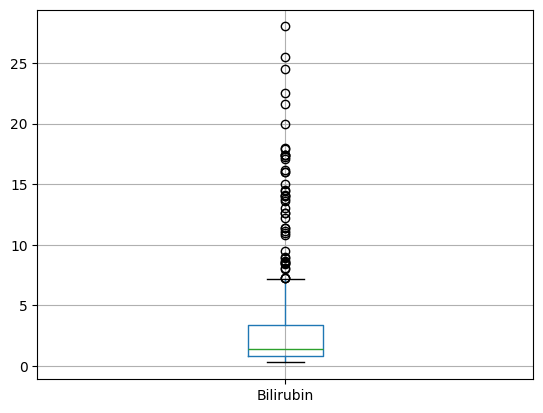

In [86]:
# 'Bilirubin'
# cek outlier
df.boxplot(column=['Bilirubin'])

In [87]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Bilirubin_outlier = detect_outliers_iqr(df['Bilirubin'])
print("Outliers di column Bilirubin:", Bilirubin_outlier)
print("Jumlah outliers di column Bilirubin:", len(Bilirubin_outlier))

Outliers di column Bilirubin: [7.3, 7.3, 7.3, 8.0, 8.1, 8.4, 8.5, 8.5, 8.6, 8.7, 8.9, 9.0, 9.5, 10.8, 11.0, 11.1, 11.4, 11.4, 12.2, 12.6, 12.6, 13.0, 13.6, 13.8, 14.0, 14.0, 14.1, 14.4, 14.5, 15.0, 16.0, 16.0, 16.2, 17.1, 17.2, 17.4, 17.4, 17.4, 17.9, 18.0, 20.0, 21.6, 22.5, 24.5, 25.5, 28.0]
Jumlah outliers di column Bilirubin: 46


In [88]:
# cek data yang ada outlier
df.loc[df['Bilirubin'].isin(Bilirubin_outlier), ['Bilirubin', 'Stage']]

,Bilirubin,Stage
0,14.5,Stage 4
9,12.6,Stage 4
17,11.4,Stage 4
22,17.4,Stage 4
26,21.6,Stage 4
27,17.2,Stage 4
62,22.5,Stage 3
68,20.0,Stage 3
73,8.4,Stage 4
74,17.1,Stage 4


In [89]:
# bandingkan dengan mean Prothrombin tiap stage
df.groupby('Stage')['Bilirubin'].mean()

,Bilirubin
Stage,
Stage 1,1.361905
Stage 2,2.453261
Stage 3,2.822981
Stage 4,4.427083


In [90]:
# saya mengambil batas 9.0 untuk outlier
# 'Bilirubin' di atas 9.0 dianggap outlier dan akan di-treat, sedangkan yang di bawah 9.0 akan dibiarkan dan dianggap variabilitas normal

# ubah list outlier jadi yg di atas 9.0 saja
Bilirubin_outlier = [x for x in Bilirubin_outlier if x > 9]
print(Bilirubin_outlier)
len(Bilirubin_outlier)

[9.5, 10.8, 11.0, 11.1, 11.4, 11.4, 12.2, 12.6, 12.6, 13.0, 13.6, 13.8, 14.0, 14.0, 14.1, 14.4, 14.5, 15.0, 16.0, 16.0, 16.2, 17.1, 17.2, 17.4, 17.4, 17.4, 17.9, 18.0, 20.0, 21.6, 22.5, 24.5, 25.5, 28.0]


34

In [91]:
# replace value outliers dengan mean berdasarkan stage-nya
# kita replace untuk menyimpan sebanyak mungkin data karena jumlah data cuma 418

# replace outliers value
# buat dataframe yang berisi mean Bilirubin untuk tiap stage
mean_Bilirubin = pd.DataFrame(df.groupby('Stage')['Bilirubin'].mean())
mean_Bilirubin['Stage'] = mean_Bilirubin.index
mean_Bilirubin

,Bilirubin,Stage
Stage,,
Stage 1,1.361905,Stage 1
Stage 2,2.453261,Stage 2
Stage 3,2.822981,Stage 3
Stage 4,4.427083,Stage 4


In [92]:
# replace outlier dengan mean
for (i, j) in zip(df['Bilirubin'], df['Stage']):
  if i in Bilirubin_outlier:
    df.loc[df['Bilirubin'] == i, 'Bilirubin'] = mean_Bilirubin.loc[mean_Bilirubin['Stage'] == j].iloc[0,0]

# cek ulang outlier
Bilirubin_outlier_list2 = []
for i in df['Bilirubin']:
  if i in Bilirubin_outlier:
    Bilirubin_outlier_list2.append(i)
print(Bilirubin_outlier_list2)

[]


##### Albumin

<Axes: >

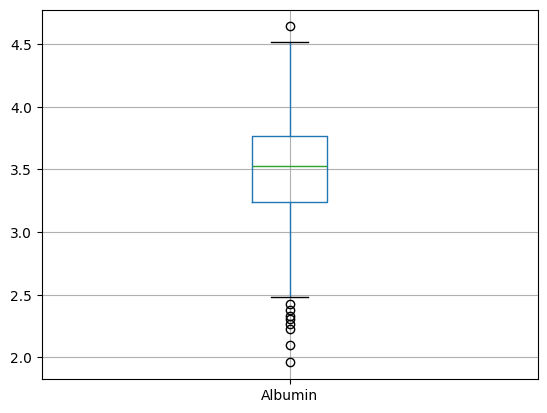

In [93]:
# 'Albumin'
# cek outlier
df.boxplot(column=['Albumin'])

In [94]:
# deteksi outlier
# pakai function detect_outliers_iqr yang dibuat tadi

# reset dulu outlier list
outliers.clear()
Albumin_outlier = detect_outliers_iqr(df['Albumin'])
print("Outliers di column Albumin:", Albumin_outlier)
print("Jumlah outliers di column Albumin:", len(Albumin_outlier))

Outliers di column Albumin: [1.96, 2.1, 2.23, 2.27, 2.31, 2.33, 2.38, 2.43, 4.64]
Jumlah outliers di column Albumin: 9


In [95]:
# cek data yang ada outlier
df.loc[df['Albumin'].isin(Albumin_outlier), ['Albumin', 'Stage']]

,Albumin,Stage
13,2.27,Stage 4
69,4.64,Stage 2
222,2.43,Stage 4
230,1.96,Stage 4
266,2.33,Stage 4
280,2.10,Stage 4
299,2.23,Stage 4
360,2.31,Stage 4
385,2.38,Stage 3


In [96]:
# bandingkan dengan mean Prothrombin tiap stage
df.groupby('Stage')['Albumin'].mean()

,Albumin
Stage,
Stage 1,3.705238
Stage 2,3.607065
Stage 3,3.582112
Stage 4,3.302431


In [97]:
# saya menganggap semua outlier karena variabilitas normal
# data dengan Albumin yang rendah mungkin saja karena pengaruh obat, makanan, atau sakit lainnya
# sedangkan data dengan Albumin 4.64 masih dianggap normal karena tidak terlalu jauh dari batas outlier dan mean pada umumnya

q1 = df['Albumin'].quantile(0.25)
q3 = df['Albumin'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

2.4512500000000004
4.561249999999999


Kita bisa lihat outlier dengan Albumin 4.64 tepat di atas upper bound, yaitu 4.56125.
Artinya dia kemungkinan besar karena variabilitas yang normal.

Sedangkan data yang di bawah lower bound kebanyakan bernilai sekitar 2.3, yaitu sedikit dibawah lower bound, yiatu 2.45125.
Artinya kemungkinan besar semua data tersebut karena variabilitas normal.

Artinya tidak ada true outlier yang perlu diatasi

### Encoding

Categorical variables yang perlu di-encode:  
1. Drug
2. Gender
3. Ascites
4. Hepatomegaly
5. Edema
6. Stage

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode column-column categorical
df['Drug'] = le.fit_transform(df['Drug'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Ascites'] = le.fit_transform(df['Ascites'])
df['Hepatomegaly'] = le.fit_transform(df['Hepatomegaly'])
df['Edema'] = le.fit_transform(df['Edema'])

# lihat kembali hasilnya
df.head(5)

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023-11-07,0,1966-03-07,0,1,1,2,4.427083,261.000000,2.60,156.0,1718.000000,137.95,172.0,190.0,12.2,Stage 4
1,2,2012-08-16,0,1968-07-01,0,0,1,0,1.100000,302.000000,4.14,54.0,2082.128333,113.52,88.0,221.0,10.6,Stage 3
2,3,2022-03-05,0,1954-11-15,1,0,0,1,1.400000,278.760000,3.48,210.0,516.000000,96.10,55.0,151.0,12.0,Stage 4
3,4,2019-09-04,0,1970-03-16,0,0,1,1,1.800000,244.000000,2.54,64.0,2017.366972,60.63,92.0,183.0,10.3,Stage 4
4,5,2020-10-29,1,1986-11-03,0,0,1,0,3.400000,354.749023,3.53,143.0,671.000000,113.15,72.0,136.0,10.9,Stage 3


In [99]:
# encode 'Stage' secara manual supaya kita tahu yang mana Stage 1, 2, 3, dan 4
df['Stage'] = df['Stage'].map({'Stage 1': 0, 'Stage 2': 1, 'Stage 3': 2, 'Stage 4': 3})
df.head(5)

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023-11-07,0,1966-03-07,0,1,1,2,4.427083,261.000000,2.60,156.0,1718.000000,137.95,172.0,190.0,12.2,3
1,2,2012-08-16,0,1968-07-01,0,0,1,0,1.100000,302.000000,4.14,54.0,2082.128333,113.52,88.0,221.0,10.6,2
2,3,2022-03-05,0,1954-11-15,1,0,0,1,1.400000,278.760000,3.48,210.0,516.000000,96.10,55.0,151.0,12.0,3
3,4,2019-09-04,0,1970-03-16,0,0,1,1,1.800000,244.000000,2.54,64.0,2017.366972,60.63,92.0,183.0,10.3,3
4,5,2020-10-29,1,1986-11-03,0,0,1,0,3.400000,354.749023,3.53,143.0,671.000000,113.15,72.0,136.0,10.9,2


### Feature Selection

1. Hapus column 'ID' karena hanya arbitrary number untuk menandakan urutan data dicatat yang artinya kemungkinan tidak akan berpengaruh terhadap klasifikasi
2. Gunakan 'Registration Date' dan 'Birth Date' untuk menghitung usia pasien saat data dicatat

In [100]:
# hitung usia pasien saat didata
from datetime import date

# buat column baru untuk simpan age
df['Age'] = -1

# bikin column baru, yaitu 'Age'
for (a, i, j) in zip(df['ID'], df['Registration Date'], df['Birth Date']):
    #print(a, i, j)
    # day_in_year harus mempertimbangkan tahun kabisat. Jadi:
    # day_in_year = (365 + 365 + 365 + 366 (tahun kabisat))/4 = 365.25
    days_in_year = (365 + 365 + 365 + 366)/4
    df.loc[df['ID'] == a, 'Age'] = int((i - j).days / days_in_year)

# cek ulang
df.head(5)

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,1,2023-11-07,0,1966-03-07,0,1,1,2,4.427083,261.000000,2.60,156.0,1718.000000,137.95,172.0,190.0,12.2,3,57
1,2,2012-08-16,0,1968-07-01,0,0,1,0,1.100000,302.000000,4.14,54.0,2082.128333,113.52,88.0,221.0,10.6,2,44
2,3,2022-03-05,0,1954-11-15,1,0,0,1,1.400000,278.760000,3.48,210.0,516.000000,96.10,55.0,151.0,12.0,3,67
3,4,2019-09-04,0,1970-03-16,0,0,1,1,1.800000,244.000000,2.54,64.0,2017.366972,60.63,92.0,183.0,10.3,3,49
4,5,2020-10-29,1,1986-11-03,0,0,1,0,3.400000,354.749023,3.53,143.0,671.000000,113.15,72.0,136.0,10.9,2,33


In [101]:
# drop 'Registration Date' dan 'Birth Date'
df = df.drop(['Registration Date', 'Birth Date'], axis = 1)

# pastikan sudah terhapus
df.head(5)

,ID,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,1,0,0,1,1,2,4.427083,261.000000,2.60,156.0,1718.000000,137.95,172.0,190.0,12.2,3,57
1,2,0,0,0,1,0,1.100000,302.000000,4.14,54.0,2082.128333,113.52,88.0,221.0,10.6,2,44
2,3,0,1,0,0,1,1.400000,278.760000,3.48,210.0,516.000000,96.10,55.0,151.0,12.0,3,67
3,4,0,0,0,1,1,1.800000,244.000000,2.54,64.0,2017.366972,60.63,92.0,183.0,10.3,3,49
4,5,1,0,0,1,0,3.400000,354.749023,3.53,143.0,671.000000,113.15,72.0,136.0,10.9,2,33


In [102]:
# reorder column 'Age' ke paling depan sekalian hapus column 'ID'
# lihat index column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Drug                       418 non-null    int64  
 2   Gender                     418 non-null    int64  
 3   Ascites                    418 non-null    int64  
 4   Hepatomegaly               418 non-null    int64  
 5   Edema                      418 non-null    int64  
 6   Bilirubin                  418 non-null    float64
 7   Cholesterol                418 non-null    float64
 8   Albumin                    418 non-null    float64
 9   Copper                     418 non-null    float64
 10  Alkaline Phospatase (U/L)  418 non-null    float64
 11  SGOT                       418 non-null    float64
 12  Tryglicerides              418 non-null    float64
 13  Platelets                  418 non-null    float64

In [103]:
# reorder
cols = list(df.columns)
df = df[[cols[16]] + cols[1:-1]]
df.head(5)

,Age,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,57,0,0,1,1,2,4.427083,261.000000,2.60,156.0,1718.000000,137.95,172.0,190.0,12.2,3
1,44,0,0,0,1,0,1.100000,302.000000,4.14,54.0,2082.128333,113.52,88.0,221.0,10.6,2
2,67,0,1,0,0,1,1.400000,278.760000,3.48,210.0,516.000000,96.10,55.0,151.0,12.0,3
3,49,0,0,0,1,1,1.800000,244.000000,2.54,64.0,2017.366972,60.63,92.0,183.0,10.3,3
4,33,1,0,0,1,0,3.400000,354.749023,3.53,143.0,671.000000,113.15,72.0,136.0,10.9,2


### Scaling
Tidak dilakukan karena model yang digunakan adalah random forest dan XG Boosting yang berbasis decision tree dan decision tree tidak perlu scaling/normalisasi.

# Model Random Forest dan XG Boosting

### Splitting data

In [104]:
# tentukan variabel x dan y
# x -> semua variabel kecuali 'Stage'
x = df.iloc[:, :-1].copy()

# y -> variabel 'Stage'
y = df.iloc[:, -1].copy()

In [105]:
# split dataset jadi test dan train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Random forest

In [106]:
# import random forest dan grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# tentukan hyperparameter yang mau di testing
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [5,8,10],
    'max_depth': [3,5,7]
}

In [107]:
# lakukan grid search
Random_forest_class= GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring= 'f1_weighted', cv=5)

In [108]:
# fit training dataset dan lihat best parameters
Random_forest_class.fit(x_train,y_train)
print("Tuned Hyperparameters :", Random_forest_class.best_params_)
print("F1 score :",Random_forest_class.best_score_)

Tuned Hyperparameters : {'criterion': 'log_loss', 'max_depth': 7, 'min_samples_split': 10}
F1 score : 0.8928305900158977


/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [109]:
# train ulang model berdasarkan best hyperparameter yang dihasilkan
Random_forest_class_best = RandomForestClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 5, random_state = 0)
Random_forest_class_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=5,
                       random_state=0)

### XGBoost

In [110]:
# import xgboost
import xgboost as xgb

# set hyperparameters untuk tuning
parameters = {
    'eta': [0.2, 0.3, 0.5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'max_depth': [3,5,7]
}

In [111]:
# downgrade sklearn ke versi 1.5.2 untuk support gridsearch xg boosting
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [112]:
# lakukan grid search
xgb_class = xgb.XGBClassifier()
grid_xgb_class = GridSearchCV(xgb_class, param_grid = parameters, scoring= 'f1_weighted', cv=5)

In [113]:
# fit data training dan cari best hyperparameternya
grid_xgb_class.fit(x_train,y_train)
print("Tuned Hyperparameters :", grid_xgb_class.best_params_)
print("F1 score :",grid_xgb_class.best_score_)

Tuned Hyperparameters : {'eta': 0.5, 'gamma': 0.3, 'max_depth': 3}
F1 score : 0.9027878926414218


In [114]:
# bikin model dengan best parameters
xgb_class_best = xgb.XGBClassifier(eta = 0.5, gamma = 0.3, max_depth = 3)
xgb_class_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Evaluasi

## Model Evaluation

In [115]:
# prediksi test dataset random forest
y_predict_rf = Random_forest_class_best.predict(x_test)

# evaluasi model
from sklearn.metrics import classification_report

# print hasil evaluasi
print('\nClassification Report Random Forest Model\n')
print(classification_report(y_test, y_predict_rf))


Classification Report Random Forest Model

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.79      0.83      0.81        18
           2       0.90      0.78      0.84        36
           3       0.79      0.96      0.87        27

    accuracy                           0.83        84
   macro avg       0.87      0.73      0.75        84
weighted avg       0.85      0.83      0.83        84



In [116]:
# prediksi test dataset XB boosting
y_predict_xgb = xgb_class_best.predict(x_test)

# evaluasi model
from sklearn.metrics import classification_report

# print hasil evaluasi
print('\nClassification Report XG Boosting model\n')
print(classification_report(y_test, y_predict_xgb))


Classification Report XG Boosting model

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.89      0.89        18
           2       0.88      0.81      0.84        36
           3       0.84      0.96      0.90        27

    accuracy                           0.87        84
   macro avg       0.90      0.83      0.86        84
weighted avg       0.87      0.87      0.87        84



In [117]:
# jumlah data di test dataset adalah 84 data
y_test.shape

(84,)

Nilai f1 score, precision, dan recall hanya sekitar 0.85 karena test dataset kecil (hanya 84). Jadi jika ada satu saja data yang salah diklasifikasi, maka akan berpengaruh banyak, yaitu 0.012 terhadap skor.

Secara keseluruhan, hasil evaluasi dari XG Boosting menunjukkan hasil yang lebih baik dari model random forest. Ini bisa dilihat dari nilai precision, recall, dan f1 XG Boosting yang lebih tinggi.  

Weighted average dari XG Boosting:  
Precision: 0.87  
Recall: 0.87  
F1: 0.87  

Weighted average dari random forest:  
Precision: 0.85  
Recall: 0.83  
F1: 0.83  

Artinya XG Boosting lebih baik dalam memprediksi stage cirrhosis pasien.

# Important Features

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

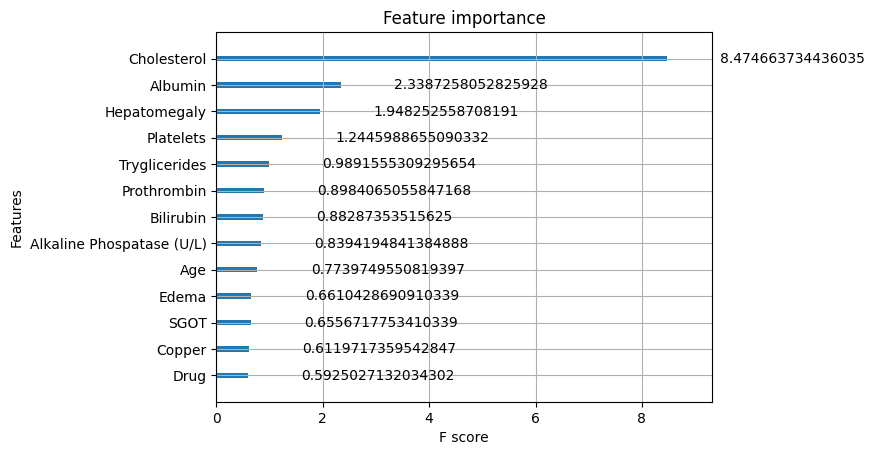

In [118]:
# plot importance setiap feature berdasarkan gain nya (seberapa besar kontribusi feature terhadap loss function)
xgb.plot_importance(xgb_class_best, importance_type = 'gain')

Dari plot di atas, dapat dilihat bahwa feature atau variable yang paling berpengaruh adalah Cholesterol. Sedangkan 9 feature lainnya tidak terlalu berpengaruh terhadap model karena nilai gainnya dibawah 1 dan mendekati 0.

Maka, feature yang penting terhadap XG Boosting adalah Cholesterol, Albumin, Hepatomegaly, dan Platelets. Sedangkan feature yang tidak penting adalah Tryglicerides, Prothrombin, Bilirubin, Alkaline Phospatase (U/L), Age, Edema, SGOT, Copper, dan Drug.